# Baseline Models on MUSED-FM using run_musedfm Functions

This notebook demonstrates how to run traditional baseline forecasting models on the MUSED-FM benchmark using the functions from `run_musedfm.py`. This provides a comparison baseline for more advanced models like Chronos.

We will use the MUSED-FM framework to load the data and run multiple baseline models including Mean, Linear Trend, ARIMA, and Exponential Smoothing.


In [1]:
import os
import pandas as pd
import numpy as np
import torch
from pathlib import Path
from typing import Optional

# Enable inline plotting in Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Import MUSED-FM components
from musedfm.data import Benchmark
from musedfm.metrics import MAPE, MAE, RMSE, NMAE

# Import functions from the examples package
from examples import (
    run_models_on_benchmark, 
    compare_model_performance, 
    export_hierarchical_results_to_csv,
    export_results_to_csv
)

# Import baseline models
from musedfm.baselines import (
    MeanForecast,
    LinearTrend,
    ARIMAForecast,
    ExponentialSmoothing,
    LinearRegressionForecast,
    HistoricalInertia
)

print("MUSED-FM components imported successfully!")


MUSED-FM components imported successfully!


In [2]:
# Configuration
BENCHMARK_PATH = "/workspace/data/fm_eval_nested/"  # Adjust this path to your MUSED-FM data
MAX_WINDOWS = 3  # Limit windows per dataset for faster testing
OUTPUT_DIR = "./results/baseline_models"

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Benchmark path: {BENCHMARK_PATH}")
print(f"Output directory: {OUTPUT_DIR}")


Benchmark path: /workspace/data/fm_eval_nested/
Output directory: ./results/baseline_models


In [3]:
# Initialize baseline models
print("Initializing baseline models...")

# Define models dictionary (same format as run_musedfm.py)
models = {
    "mean": {"model": MeanForecast(), "univariate": True},
    "linear_trend": {"model": LinearTrend(), "univariate": True},
    "arima": {"model": ARIMAForecast(), "univariate": True},
    "exponential_smoothing": {"model": ExponentialSmoothing(), "univariate": True},
    "linear_regression": {"model": LinearRegressionForecast(), "univariate": False},
    "historical_inertia": {"model": HistoricalInertia(), "univariate": True}
}

print(f"Initialized {len(models)} baseline models:")
for model_name in models.keys():
    print(f"  - {model_name}")


Initializing baseline models...
Initialized 6 baseline models:
  - mean
  - linear_trend
  - arima
  - exponential_smoothing
  - linear_regression
  - historical_inertia


In [6]:
# Import plotting utilities
import matplotlib.pyplot as plt
from musedfm.plotting import plot_window_forecasts, plot_multiple_windows, plot_baseline_comparison

# Run baseline models evaluation with plot data collection (one window per dataset)
print("Starting baseline models evaluation with plot data collection...")

# Run evaluation using the efficient run_musedfm function with plot data collection
results = run_models_on_benchmark(
    benchmark_path=BENCHMARK_PATH,
    models=models,
    max_windows=MAX_WINDOWS,
    history_length=512,
    forecast_horizon=128,
    stride=256,
    load_cached_counts=True,
    collect_plot_data=True  # Enable plot data collection
)

print("Evaluation completed successfully!")

# Use plot data directly from results
if '_plot_data' in results:
    plot_data = results['_plot_data']
    print(f"\nUsing {len(plot_data)} windows directly from results for plotting")
    print("Plot data ready for visualization!")
else:
    print("No plot data collected during evaluation.")


Starting baseline models evaluation with plot data collection...
Running Multiple Models on Benchmark
Loading KITTI data from /workspace/data/fm_eval_nested/sequential/KITTI
Found 6114 parquet files
Successfully loaded 6114 valid files
Domain ALL_DATASETS not found in file hierarchy
successfully counted windows from cached JSON files
Domain ALL_DATASETS not found in file hierarchy
successfully counted windows from cached JSON files
Dataset aus_electricity not found in data_hierarchy.json
Loading ECL data from /workspace/data/fm_eval_nested/traditional/ecl
Found 1 parquet files
Successfully loaded 1 valid files
/workspace/data/fm_eval_nested/traditional/open_aq [PosixPath('/workspace/data/fm_eval_nested/traditional/open_aq/delhi_combined.parquet'), PosixPath('/workspace/data/fm_eval_nested/traditional/open_aq/reykjavik_combined.parquet'), PosixPath('/workspace/data/fm_eval_nested/traditional/open_aq/rotterdam_combined.parquet'), PosixPath('/workspace/data/fm_eval_nested/traditional/open

In [7]:
# Compare model performance
compare_model_performance(results)



Model Performance Comparison
Model                MAPE (%)   MAE        RMSE       NMAE       Time (s)  
--------------------------------------------------------------------------------
mean                 239.28     4372426.5880 5923672.2491 0.3300     67.61     
linear_trend         1858.18    5504192.5461 7145642.7614 0.3159     77.18     
arima                1330.05    4367742.6241 5843290.3151 1.0106     87.05     
exponential_smoothing 1369.27    5083887.2336 6708267.1544 1.0453     105.56    
linear_regression    13061689.71 4441029.4241 5970002.1475 -76520.6992 123.85    
linear_regression_univariate 1858.18    5504192.5490 7145642.7628 0.3159     156.66    
historical_inertia   1035.37    7597187.8826 9163389.5574 0.0983     156.66    

Best Performance:
  Lowest MAPE: mean (239.28%)
  Lowest MAE:  arima (4367742.6241)
  Lowest RMSE: arima (5843290.3151)
  Fastest:     mean (67.61s)


Creating individual forecast plots...
Started Processing sequential/cifar100_timeseries_csvs - Window 0
Started Processing sequential/KITTI - Window 3
Plot saved to: results/baseline_models/plots/baseline_forecast_3.png


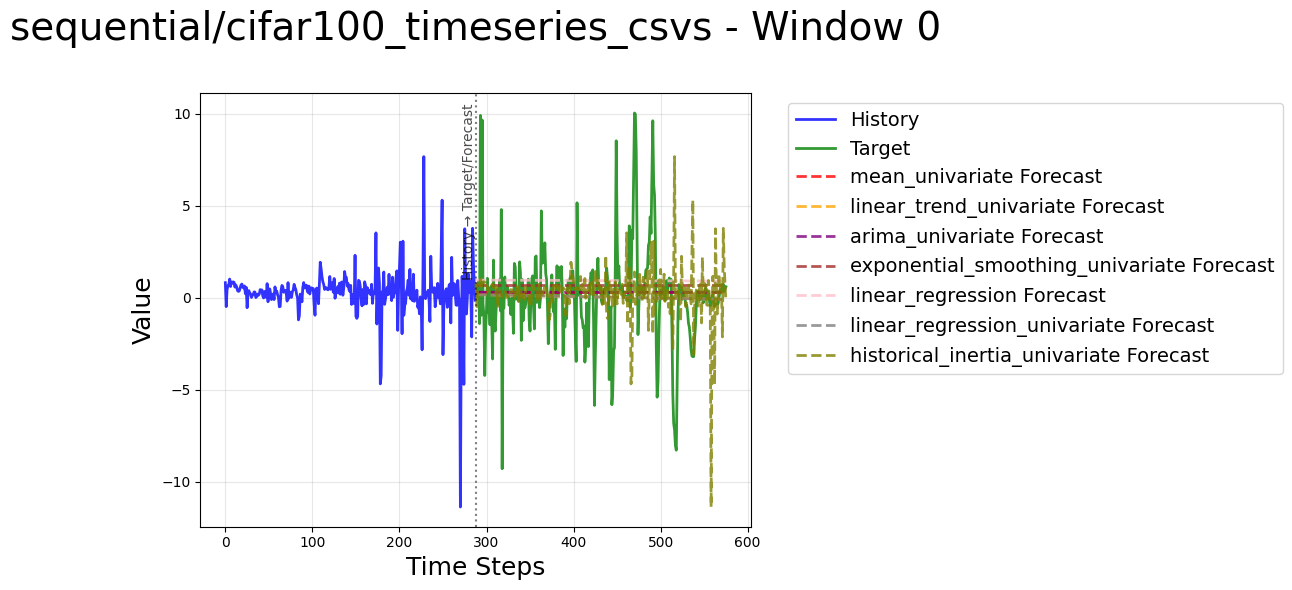

Saved plot 7: sequential/KITTI - Window 3
Started Processing sequential/ant_csv_out - Window 6
Plot saved to: results/baseline_models/plots/baseline_forecast_6.png


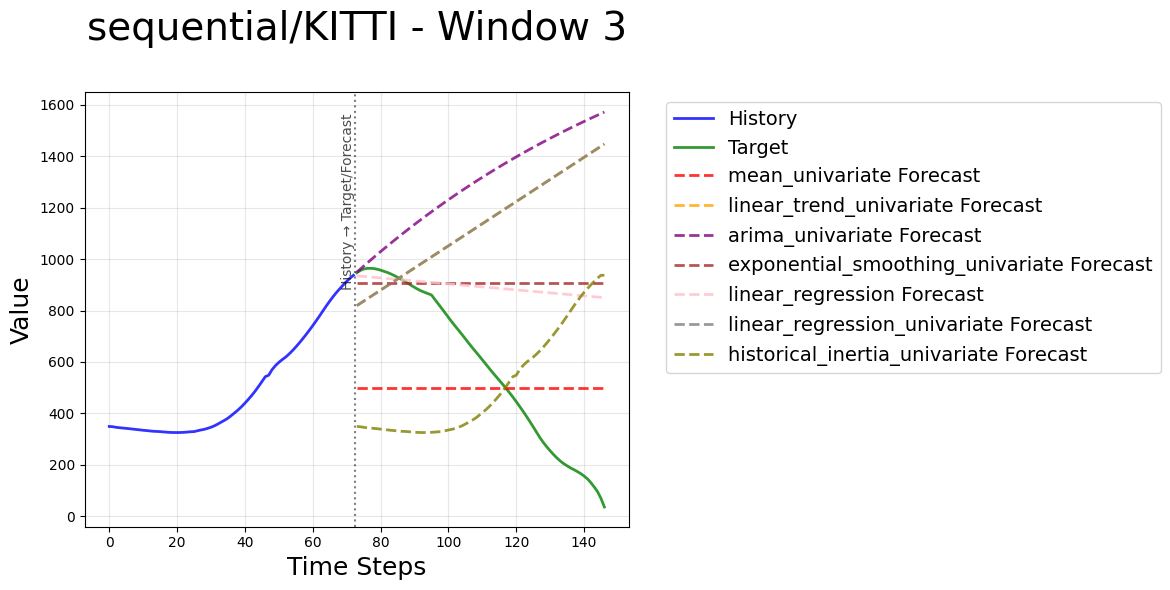

Saved plot 13: sequential/ant_csv_out - Window 6
Started Processing sequential/hopper_csv_out - Window 9
Plot saved to: results/baseline_models/plots/baseline_forecast_9.png


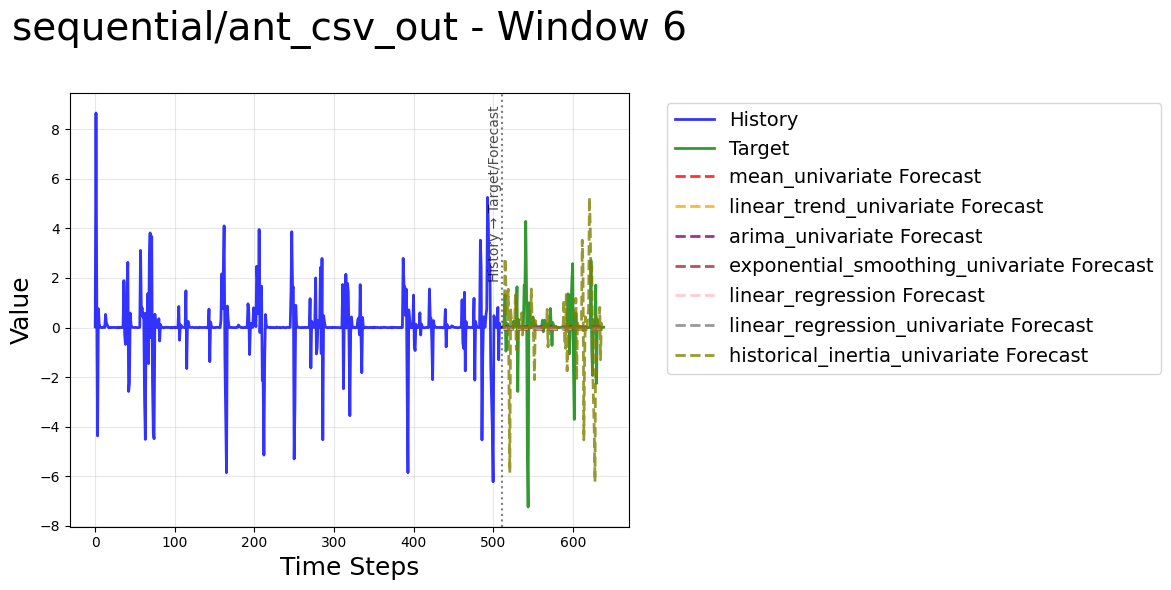

Saved plot 19: sequential/hopper_csv_out - Window 9
Started Processing sequential/spriteworld - Window 12
Plot saved to: results/baseline_models/plots/baseline_forecast_12.png


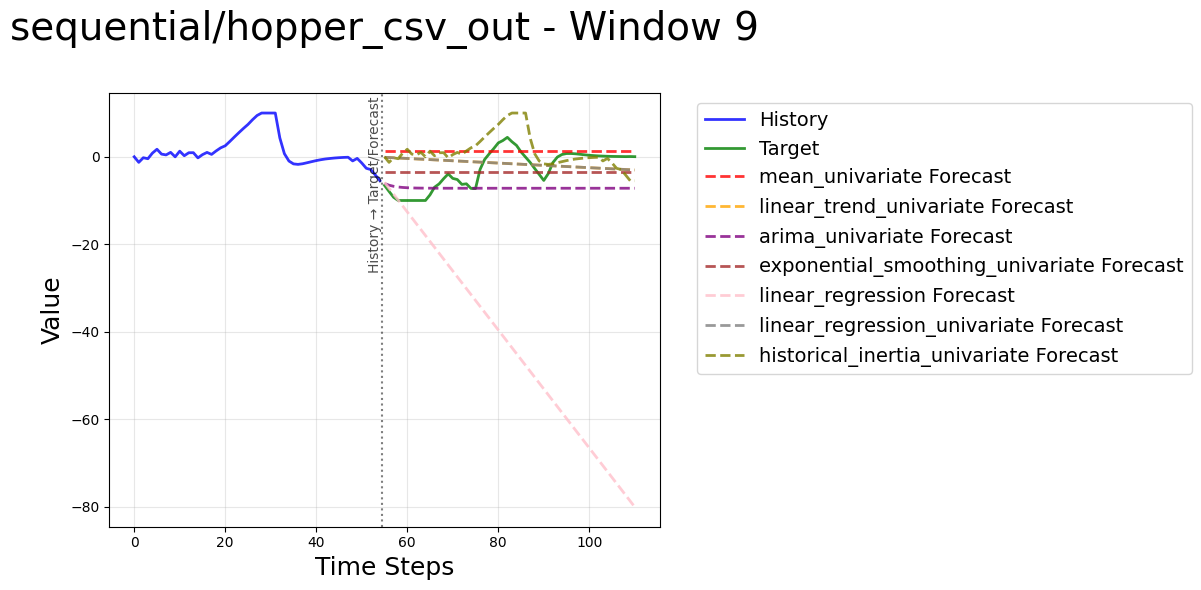

Saved plot 25: sequential/spriteworld - Window 12
Started Processing sequential/walker2d_csv_out - Window 15
Plot saved to: results/baseline_models/plots/baseline_forecast_15.png


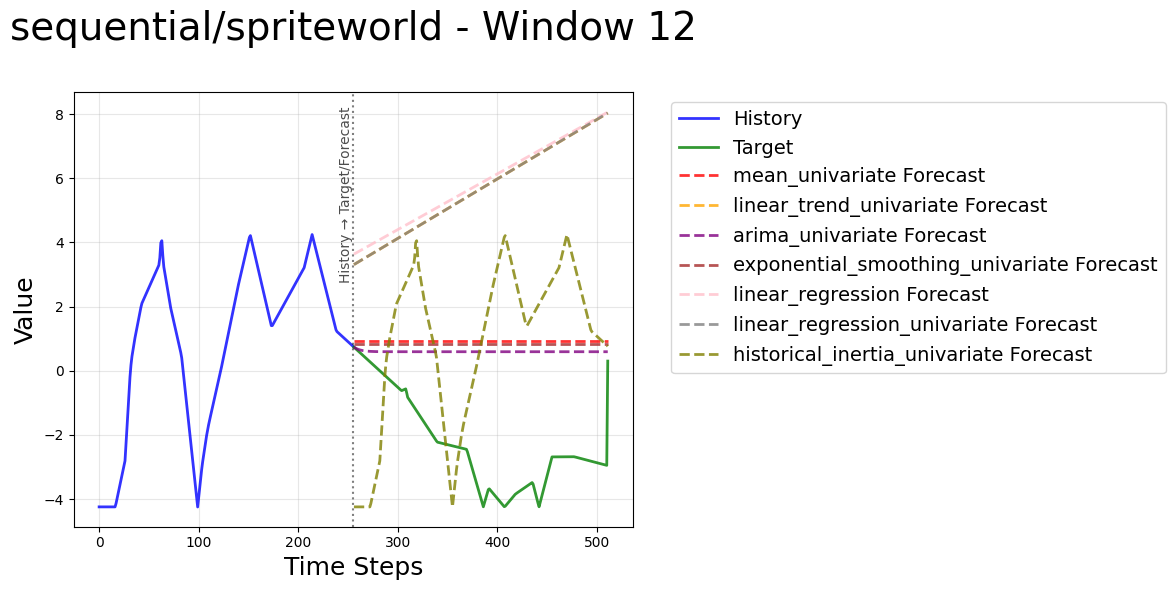

Saved plot 31: sequential/walker2d_csv_out - Window 15
Started Processing sequential/cheetah_csv_out - Window 18
Plot saved to: results/baseline_models/plots/baseline_forecast_18.png


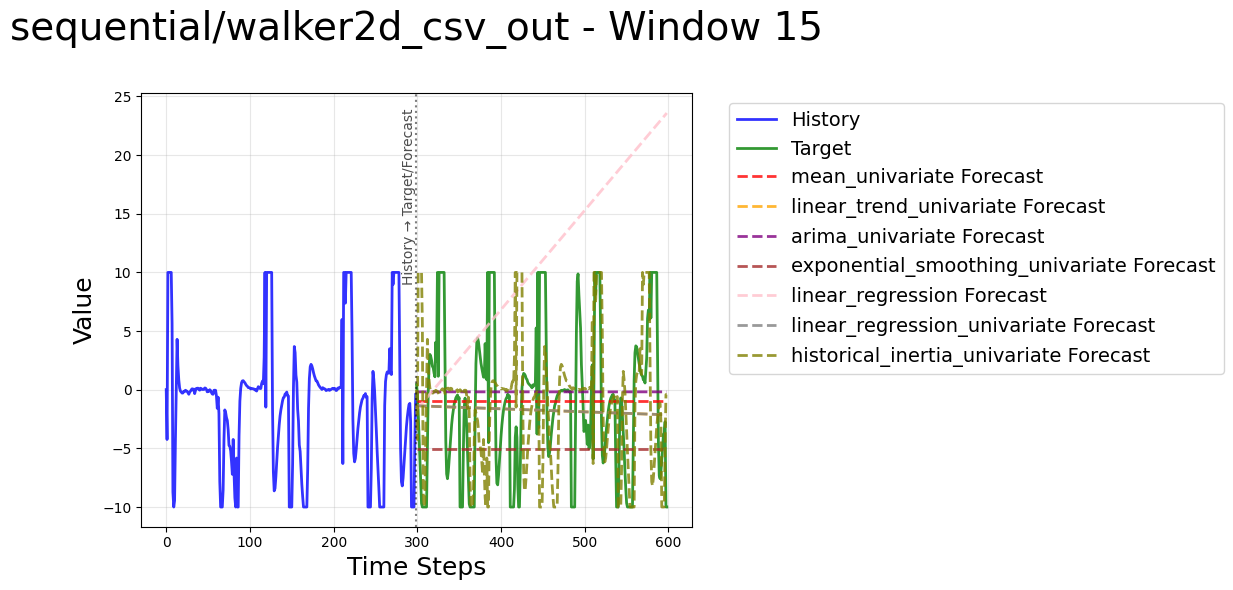

Saved plot 37: sequential/cheetah_csv_out - Window 18
Started Processing sequential/openwebtext_timeseries_csvs - Window 21
Plot saved to: results/baseline_models/plots/baseline_forecast_21.png


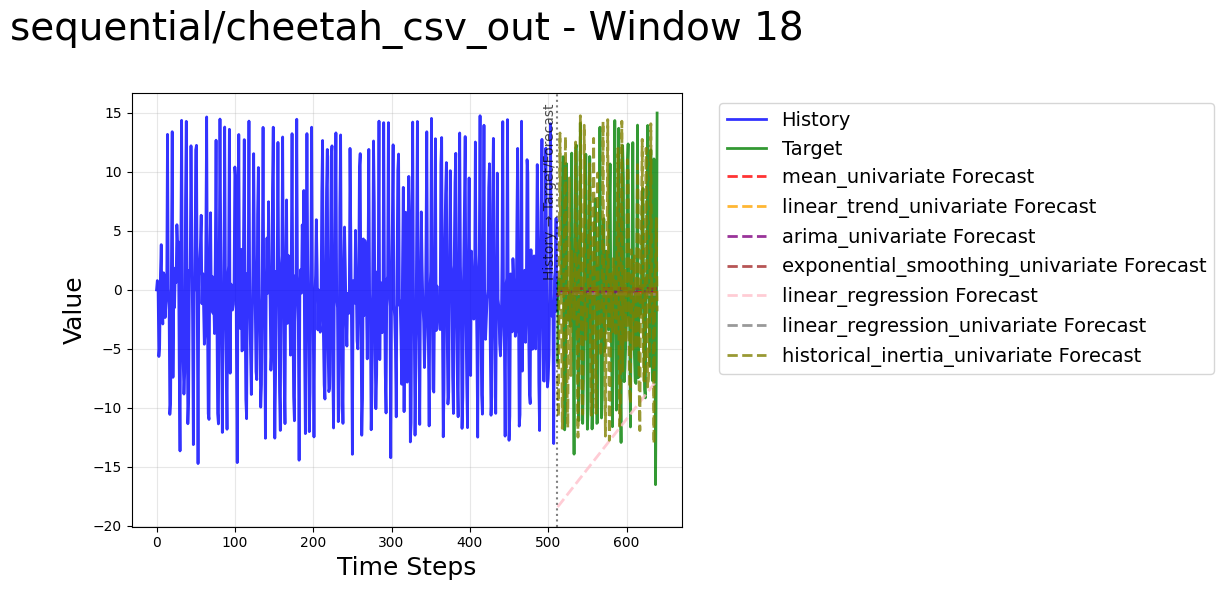

Saved plot 43: sequential/openwebtext_timeseries_csvs - Window 21
Started Processing synthetic/synthetic_scm/large_convlag_synin_s - Window 24
Plot saved to: results/baseline_models/plots/baseline_forecast_24.png


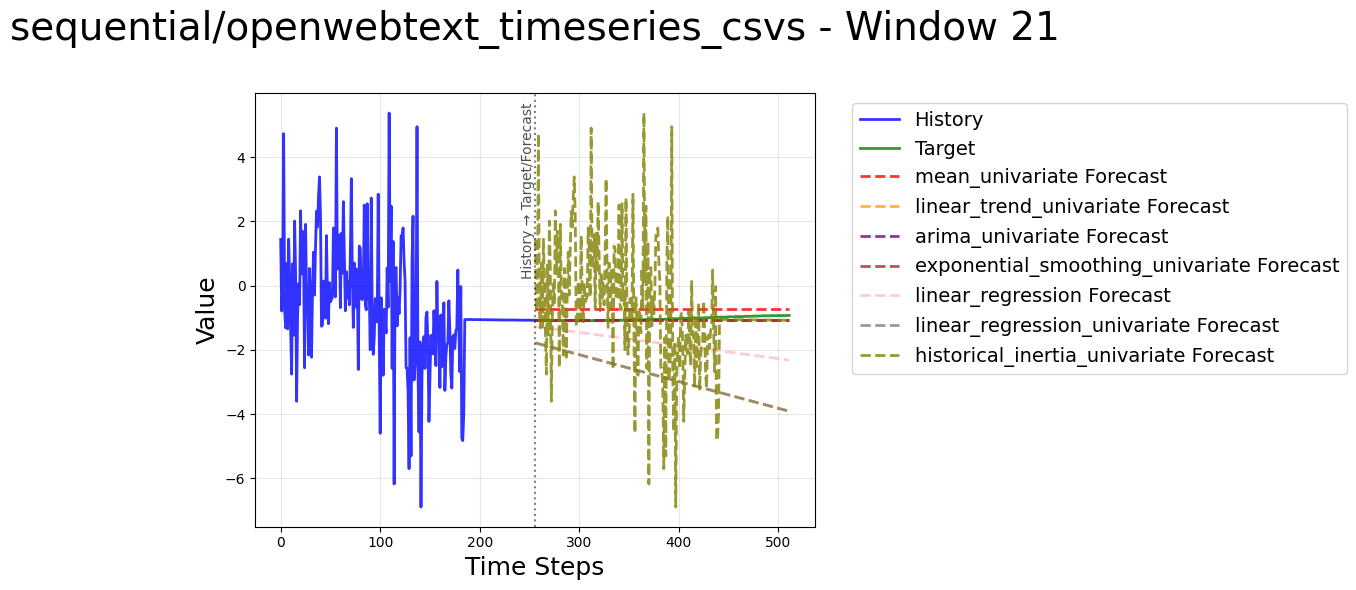

Saved plot 49: synthetic/synthetic_scm/large_convlag_synin_s - Window 24

Individual plots saved to: ./results/baseline_models/plots


In [13]:
import copy
# Create individual plots for each window
if plot_data:
    print("Creating individual forecast plots...")
    
    # Create plots directory
    plots_dir = os.path.join(OUTPUT_DIR, "plots")
    os.makedirs(plots_dir, exist_ok=True)
    
    current_dataset_window_forecasts = ("", -1, {})
    last_window = None
    for i, data in enumerate(plot_data[:50]):  # Plot first 6 windows
        window = data['window']
        forecast = data['forecast']
        univariate_forecast = data['univariate_forecast']
        dataset_name = data['dataset_name']
        window_index = data['window_index']
        model_name = data['model_name']
        to_plot = False
        if current_dataset_window_forecasts[0] != dataset_name or current_dataset_window_forecasts[1] != window_index:
            to_plot = current_dataset_window_forecasts[0] != ""
            last_dataset_window_forecasts = copy.deepcopy(current_dataset_window_forecasts)
            current_dataset_window_forecasts = (dataset_name, window_index, {})
            print(f"Started Processing {dataset_name} - Window {window_index}")
        if forecast is not None:
            current_dataset_window_forecasts[2][model_name] = forecast
        if univariate_forecast is not None:
            current_dataset_window_forecasts[2][f"{model_name}_univariate"] = univariate_forecast
        if to_plot:
            # Create title
            forecasts = last_dataset_window_forecasts[2]
            title = f"{last_dataset_window_forecasts[0]} - Window {last_dataset_window_forecasts[1]}\n"
            
            # Plot the window
            plt = plot_window_forecasts(
                window=last_window,
                forecasts=forecasts,
                title=title,
                figsize=(12, 6),
                save_path=os.path.join(plots_dir, f"baseline_forecast_{window_index}.png"),
                show_plot=True
            )
            
            print(f"Saved plot {i+1}: {dataset_name} - Window {window_index}")
        last_window = window
    
    print(f"\nIndividual plots saved to: {plots_dir}")
    
else:
    print("No plot data available.")


In [14]:
# Export hierarchical results to CSV
export_hierarchical_results_to_csv(results, output_dir=OUTPUT_DIR)



Exporting Hierarchical Results to CSV
✓ Cleaned directory: ./results/baseline_models/categories
✓ Cleaned directory: ./results/baseline_models/domains
✓ Cleaned directory: ./results/baseline_models/datasets
✓ Category results saved: mean_category_results.csv
✓ Category results saved: linear_trend_category_results.csv
✓ Category results saved: arima_category_results.csv
✓ Category results saved: exponential_smoothing_category_results.csv
✓ Category results saved: linear_regression_category_results.csv
✓ Category results saved: linear_regression_univariate_category_results.csv
✓ Category results saved: historical_inertia_category_results.csv
✓ Dataset results saved: mean_dataset_results.csv
✓ Dataset results saved: linear_trend_dataset_results.csv
✓ Dataset results saved: arima_dataset_results.csv
✓ Dataset results saved: exponential_smoothing_dataset_results.csv
✓ Dataset results saved: linear_regression_dataset_results.csv
✓ Dataset results saved: linear_regression_univariate_dataset_

In [15]:
# Display results summary
print("\nBaseline Models Results Summary:")
print("=" * 50)

for model_name in models.keys():
    if model_name in results:
        model_results = results[model_name]
        print(f"\n{model_name.upper()}:")
        print(f"  Total windows processed: {model_results['windows']}")
        print(f"  Total time: {model_results['time']:.2f} seconds")
        
        if model_results['metrics']:
            metrics = model_results['metrics']
            print(f"  Average MAPE: {metrics.get('MAPE', 'N/A'):.2f}%")
            print(f"  Average MAE: {metrics.get('MAE', 'N/A'):.4f}")
            print(f"  Average RMSE: {metrics.get('RMSE', 'N/A'):.4f}")
            print(f"  Average NMAE: {metrics.get('NMAE', 'N/A'):.4f}")

print(f"\nResults saved to: {OUTPUT_DIR}")



Baseline Models Results Summary:

MEAN:
  Total windows processed: 250
  Total time: 67.61 seconds
  Average MAPE: 239.28%
  Average MAE: 4372426.5880
  Average RMSE: 5923672.2491
  Average NMAE: 0.3300

LINEAR_TREND:
  Total windows processed: 250
  Total time: 77.18 seconds
  Average MAPE: 1858.18%
  Average MAE: 5504192.5461
  Average RMSE: 7145642.7614
  Average NMAE: 0.3159

ARIMA:
  Total windows processed: 250
  Total time: 87.05 seconds
  Average MAPE: 1330.05%
  Average MAE: 4367742.6241
  Average RMSE: 5843290.3151
  Average NMAE: 1.0106

EXPONENTIAL_SMOOTHING:
  Total windows processed: 250
  Total time: 105.56 seconds
  Average MAPE: 1369.27%
  Average MAE: 5083887.2336
  Average RMSE: 6708267.1544
  Average NMAE: 1.0453

LINEAR_REGRESSION:
  Total windows processed: 250
  Total time: 123.85 seconds
  Average MAPE: 13061689.71%
  Average MAE: 4441029.4241
  Average RMSE: 5970002.1475
  Average NMAE: -76520.6992

HISTORICAL_INERTIA:
  Total windows processed: 250
  Total ti

## Summary

This notebook demonstrates how to run traditional baseline forecasting models on the MUSED-FM benchmark using the efficient functions from `run_musedfm.py`. 

### Key Benefits:

1. **Comprehensive Baseline**: Tests multiple traditional forecasting methods
2. **Efficient**: Uses optimized evaluation functions instead of custom loops
3. **Comparative**: Allows direct comparison between different baseline models
4. **Visual**: Generates plots showing how each model performs
5. **Minimal code**: Only ~10 cells vs. hundreds of lines in custom evaluation

### Models Tested:

- **Mean Forecast**: Simple average of historical values
- **Linear Trend**: Linear regression on time
- **ARIMA**: AutoRegressive Integrated Moving Average
- **Exponential Smoothing**: Weighted average with exponential decay

### Functions Used:

- `run_models_on_benchmark()`: Main evaluation function
- `compare_model_performance()`: Performance comparison
- `export_hierarchical_results_to_csv()`: Hierarchical CSV export
- `plot_window_forecasts()`: Individual forecast visualization
- `plot_multiple_windows()`: Multi-window comparison
- `plot_baseline_comparison()`: Model comparison with metrics

This approach provides a solid baseline for comparing more advanced models like Chronos Bolt, and leverages the existing, well-tested evaluation framework while keeping the notebook clean and efficient.
